In [1]:
import os
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

import autoneuronet as ann

ann.__version__

/Users/rishabalagharu/.pyenv/versions/3.13.7/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'0.1.2'

# Moons Classification with Activation Functions


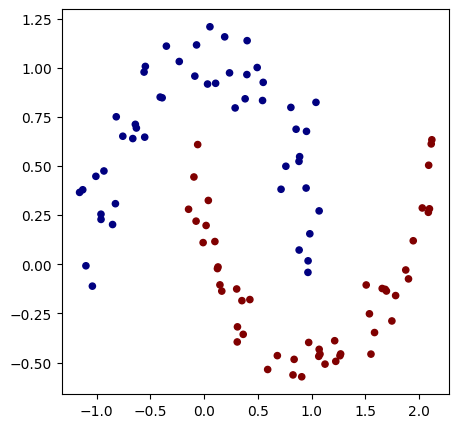

In [2]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
def numpy_to_matrix(numpy_array: np.ndarray) -> ann.Matrix:
    numpy_array = np.asarray(numpy_array, dtype=float)

    if numpy_array.ndim == 1:
        numpy_array = numpy_array.reshape(-1, 1)
    elif numpy_array.ndim != 2:
        raise ValueError("Please pass in a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = ann.Matrix(rows, cols)

    for i in range(rows):
        for j in range(cols):
            matrix[i, j] = float(numpy_array[i, j])

    return matrix

In [4]:
X_matrix = numpy_to_matrix(X)
y_matrix = numpy_to_matrix(y)

In [5]:
lr = 1e-2
epochs = 5000

model = ann.NeuralNetwork(
    [
        ann.Linear(2, 16, init="he"),
        ann.ReLU(),
        ann.Linear(16, 16, init="he"),
        ann.ReLU(),
        ann.Linear(16, 1, init="he"),
        ann.Sigmoid(),
    ]
)
optimizer = ann.GradientDescentOptimizer(learning_rate=lr, model=model)

model

NeuralNetwork =
Linear(2, 16)
ReLU()
Linear(16, 16)
ReLU()
Linear(16, 1)
Sigmoid()

In [6]:
# Training Loop

for epoch in tqdm(
    range(epochs), desc="Training the moons classification Neural Network"
):
    optimizer.resetGrad()

    # Forward pass
    y_pred = model.forward(X_matrix)

    # Calculate the loss
    loss = ann.BCELoss(y_matrix, y_pred)
    loss_val = loss.val

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Training the moons classification Neural Network:   0%|          | 18/5000 [00:00<00:58, 85.64it/s]

Epoch: 1 | Train Loss: 0.7715002956935701


Training the moons classification Neural Network:   3%|▎         | 127/5000 [00:01<00:36, 134.97it/s]

Epoch: 101 | Train Loss: 0.635744374302004


Training the moons classification Neural Network:   4%|▍         | 218/5000 [00:01<00:32, 148.08it/s]

Epoch: 201 | Train Loss: 0.5533053579994787


Training the moons classification Neural Network:   6%|▋         | 324/5000 [00:02<00:34, 137.13it/s]

Epoch: 301 | Train Loss: 0.49361490568806377


Training the moons classification Neural Network:   8%|▊         | 422/5000 [00:03<00:36, 127.00it/s]

Epoch: 401 | Train Loss: 0.45056645524358385


Training the moons classification Neural Network:  10%|█         | 524/5000 [00:04<00:36, 123.96it/s]

Epoch: 501 | Train Loss: 0.41742104327024676


Training the moons classification Neural Network:  12%|█▏        | 623/5000 [00:04<00:33, 132.18it/s]

Epoch: 601 | Train Loss: 0.3900509384378264


Training the moons classification Neural Network:  14%|█▍        | 722/5000 [00:05<00:31, 136.26it/s]

Epoch: 701 | Train Loss: 0.3663643149619861


Training the moons classification Neural Network:  16%|█▋        | 821/5000 [00:06<00:34, 119.47it/s]

Epoch: 801 | Train Loss: 0.3458674594108717


Training the moons classification Neural Network:  18%|█▊        | 918/5000 [00:07<00:31, 128.68it/s]

Epoch: 901 | Train Loss: 0.3275965447694086


Training the moons classification Neural Network:  20%|██        | 1022/5000 [00:07<00:28, 141.07it/s]

Epoch: 1001 | Train Loss: 0.3113548841991753


Training the moons classification Neural Network:  23%|██▎       | 1126/5000 [00:08<00:27, 140.28it/s]

Epoch: 1101 | Train Loss: 0.2972903466023327


Training the moons classification Neural Network:  25%|██▍       | 1230/5000 [00:09<00:26, 142.54it/s]

Epoch: 1201 | Train Loss: 0.2849040257123461


Training the moons classification Neural Network:  26%|██▋       | 1320/5000 [00:09<00:25, 143.15it/s]

Epoch: 1301 | Train Loss: 0.27397891668870805


Training the moons classification Neural Network:  28%|██▊       | 1425/5000 [00:10<00:24, 144.29it/s]

Epoch: 1401 | Train Loss: 0.2641903798016267


Training the moons classification Neural Network:  30%|███       | 1514/5000 [00:11<00:26, 130.30it/s]

Epoch: 1501 | Train Loss: 0.255157557545493


Training the moons classification Neural Network:  32%|███▎      | 1625/5000 [00:12<00:25, 132.86it/s]

Epoch: 1601 | Train Loss: 0.24686221685984377


Training the moons classification Neural Network:  35%|███▍      | 1729/5000 [00:12<00:23, 139.37it/s]

Epoch: 1701 | Train Loss: 0.2393606225882486


Training the moons classification Neural Network:  36%|███▋      | 1819/5000 [00:13<00:22, 140.13it/s]

Epoch: 1801 | Train Loss: 0.23251431858478863


Training the moons classification Neural Network:  38%|███▊      | 1922/5000 [00:14<00:22, 136.21it/s]

Epoch: 1901 | Train Loss: 0.22602021066964714


Training the moons classification Neural Network:  40%|████      | 2025/5000 [00:15<00:21, 140.33it/s]

Epoch: 2001 | Train Loss: 0.2198482752232459


Training the moons classification Neural Network:  43%|████▎     | 2130/5000 [00:15<00:19, 145.82it/s]

Epoch: 2101 | Train Loss: 0.2130365259293243


Training the moons classification Neural Network:  44%|████▍     | 2220/5000 [00:16<00:18, 147.15it/s]

Epoch: 2201 | Train Loss: 0.20611974294213398


Training the moons classification Neural Network:  46%|████▋     | 2325/5000 [00:17<00:18, 146.23it/s]

Epoch: 2301 | Train Loss: 0.19838935913190966


Training the moons classification Neural Network:  49%|████▊     | 2430/5000 [00:17<00:17, 146.05it/s]

Epoch: 2401 | Train Loss: 0.19011373114779329


Training the moons classification Neural Network:  50%|█████     | 2520/5000 [00:18<00:16, 146.87it/s]

Epoch: 2501 | Train Loss: 0.1821281082977364


Training the moons classification Neural Network:  52%|█████▎    | 2625/5000 [00:19<00:16, 147.43it/s]

Epoch: 2601 | Train Loss: 0.17468828673842143


Training the moons classification Neural Network:  54%|█████▍    | 2715/5000 [00:19<00:16, 134.70it/s]

Epoch: 2701 | Train Loss: 0.16730477203765828


Training the moons classification Neural Network:  56%|█████▋    | 2819/5000 [00:20<00:16, 135.44it/s]

Epoch: 2801 | Train Loss: 0.1600561483266294


Training the moons classification Neural Network:  58%|█████▊    | 2924/5000 [00:21<00:14, 143.00it/s]

Epoch: 2901 | Train Loss: 0.15300908663443538


Training the moons classification Neural Network:  61%|██████    | 3029/5000 [00:22<00:13, 141.96it/s]

Epoch: 3001 | Train Loss: 0.1459221865002831


Training the moons classification Neural Network:  62%|██████▏   | 3119/5000 [00:22<00:13, 143.88it/s]

Epoch: 3101 | Train Loss: 0.13867180648846397


Training the moons classification Neural Network:  64%|██████▍   | 3224/5000 [00:23<00:12, 145.27it/s]

Epoch: 3201 | Train Loss: 0.13187000954887776


Training the moons classification Neural Network:  67%|██████▋   | 3326/5000 [00:24<00:12, 139.06it/s]

Epoch: 3301 | Train Loss: 0.125404043492353


Training the moons classification Neural Network:  68%|██████▊   | 3416/5000 [00:24<00:10, 145.54it/s]

Epoch: 3401 | Train Loss: 0.11906906935114145


Training the moons classification Neural Network:  70%|███████   | 3521/5000 [00:25<00:10, 146.31it/s]

Epoch: 3501 | Train Loss: 0.11268513741380913


Training the moons classification Neural Network:  73%|███████▎  | 3626/5000 [00:26<00:09, 144.58it/s]

Epoch: 3601 | Train Loss: 0.10664990667786045


Training the moons classification Neural Network:  74%|███████▍  | 3716/5000 [00:26<00:08, 146.52it/s]

Epoch: 3701 | Train Loss: 0.10042338100152551


Training the moons classification Neural Network:  76%|███████▋  | 3821/5000 [00:27<00:07, 147.48it/s]

Epoch: 3801 | Train Loss: 0.09434579678244699


Training the moons classification Neural Network:  79%|███████▊  | 3926/5000 [00:28<00:07, 145.89it/s]

Epoch: 3901 | Train Loss: 0.08845117848426297


Training the moons classification Neural Network:  80%|████████  | 4016/5000 [00:28<00:06, 146.82it/s]

Epoch: 4001 | Train Loss: 0.08290587613243253


Training the moons classification Neural Network:  82%|████████▏ | 4121/5000 [00:29<00:06, 140.87it/s]

Epoch: 4101 | Train Loss: 0.07775480285320681


Training the moons classification Neural Network:  85%|████████▍ | 4226/5000 [00:30<00:05, 143.64it/s]

Epoch: 4201 | Train Loss: 0.07297207791674527


Training the moons classification Neural Network:  86%|████████▋ | 4316/5000 [00:31<00:04, 145.69it/s]

Epoch: 4301 | Train Loss: 0.0685329572512363


Training the moons classification Neural Network:  88%|████████▊ | 4421/5000 [00:31<00:03, 145.90it/s]

Epoch: 4401 | Train Loss: 0.06440918747045687


Training the moons classification Neural Network:  90%|█████████ | 4525/5000 [00:32<00:03, 141.66it/s]

Epoch: 4501 | Train Loss: 0.06059690389970338


Training the moons classification Neural Network:  93%|█████████▎| 4630/5000 [00:33<00:02, 145.96it/s]

Epoch: 4601 | Train Loss: 0.05706800901119871


Training the moons classification Neural Network:  94%|█████████▍| 4720/5000 [00:33<00:01, 145.48it/s]

Epoch: 4701 | Train Loss: 0.053827425202299696


Training the moons classification Neural Network:  96%|█████████▋| 4825/5000 [00:34<00:01, 143.27it/s]

Epoch: 4801 | Train Loss: 0.05085241092218772


Training the moons classification Neural Network:  99%|█████████▊| 4930/5000 [00:35<00:00, 145.79it/s]

Epoch: 4901 | Train Loss: 0.048130176101692915


Training the moons classification Neural Network: 100%|██████████| 5000/5000 [00:35<00:00, 139.73it/s]


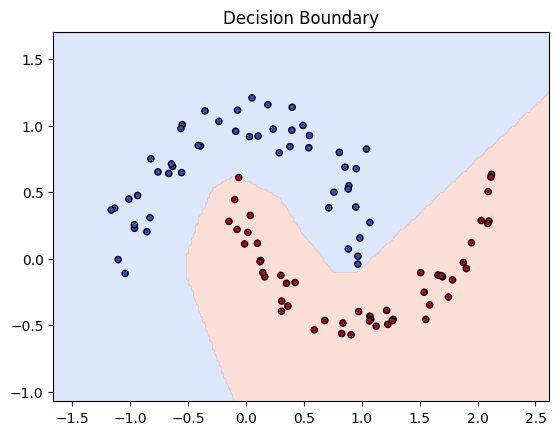

In [7]:
X = np.asarray(X)
y = np.asarray(y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

grid_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step),
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_mat = numpy_to_matrix(grid)
preds = model.forward(grid_mat)

Z = np.array([preds[i, 0].getVal() for i in range(preds.rows)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundary")
plt.show()

In [8]:
os.makedirs("models", exist_ok=True)
model.saveWeights("models/moons_model.bin")

In [9]:
model.loadWeights("models/moons_model.bin")